### Import the libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Load data

Here, we are having two datasets: Training and Testing Datasets

In [2]:
#reading csv file
train=pd.read_csv(r"C:\Users\rakhi\Downloads\train_LZdllcl.csv")
test=pd.read_csv(r"C:\Users\rakhi\Downloads\test_2umaH9m.csv")

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
print("Shape of train data: ",train.shape)
print("Shape of test data: ",test.shape)

Shape of train data:  (54808, 14)
Shape of test data:  (23490, 13)


In [6]:
# columns in Training Data
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [7]:
# columns in Testing Data
test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

### Describe data

In [8]:
# unique values in each columns
train.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [9]:
# descriptive statistics for numerical columns
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [10]:
# descriptive statistics for categorical columns
train.describe(include = "object")

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


<AxesSubplot:ylabel='is_promoted'>

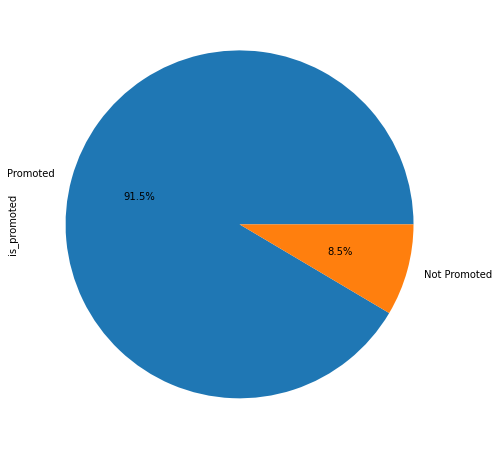

In [11]:
# checking the Target Class Balance
labels = ["Promoted","Not Promoted"]
train.is_promoted.value_counts().plot(kind="pie",labels=labels,autopct='%.1f%%',figsize=(8,8))

We can easily see that the Target Class is highly imbalanced. We must balance these classes of Target Class.

### Handling missing values

In [12]:
# calculate the total missing values in the train dataset
train_miss=train.isna().sum()
train_miss

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [13]:
# calculate the percentage of missing values in the train dataset
train_percent=train_miss[train_miss>0]/len(train)*100
train_percent

education               4.395344
previous_year_rating    7.524449
dtype: float64

In [14]:
# calculate the total missing values in the test dataset
test_miss=test.isna().sum()
test_miss

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [15]:
# calculate the percentage of missing values in the test dataset
test_percent=test_miss[test_miss>0]/len(test)*100
test_percent

education               4.401873
previous_year_rating    7.713921
dtype: float64

Only two columns have missing values in Train and Test Dataset. The percentage of missing values is around 4% and 7% in education and previous_year_rating respectively.

In [16]:
train[train["previous_year_rating"].isnull()==True]["length_of_service"].value_counts()

1    4124
Name: length_of_service, dtype: int64

In [17]:
test[test["previous_year_rating"].isnull()==True]["length_of_service"].value_counts()

1    1812
Name: length_of_service, dtype: int64

We can see that previous_year_rating is missing for those employees whose length of service is 1. So, we can fill those value by 0.

In [18]:
# impute missing values in the Training Data
train['education'] = train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating'] = train['previous_year_rating'].fillna(0)

In [19]:
# check whether the Null values are still present
train.isna().sum().sum()

0

In [20]:
# impute missing values in the Testing Data
test['education'] = test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating'] = test['previous_year_rating'].fillna(0)

In [21]:
# check whether the Null values are still present
test.isna().sum().sum()

0

There are no null values left in any of the datasets.

### Duplication Handling

In [22]:
train.duplicated().any()

False

In [23]:
test.duplicated().any()

False

There are no duplicate values.

### Label Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
a=["department","region","education","gender","recruitment_channel"]
for i in np.arange(len(a)):
    train[a[i]]= le.fit_transform(train[a[i]])
    test[a[i]]= le.fit_transform(test[a[i]])

In [25]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


### Outlier Detection

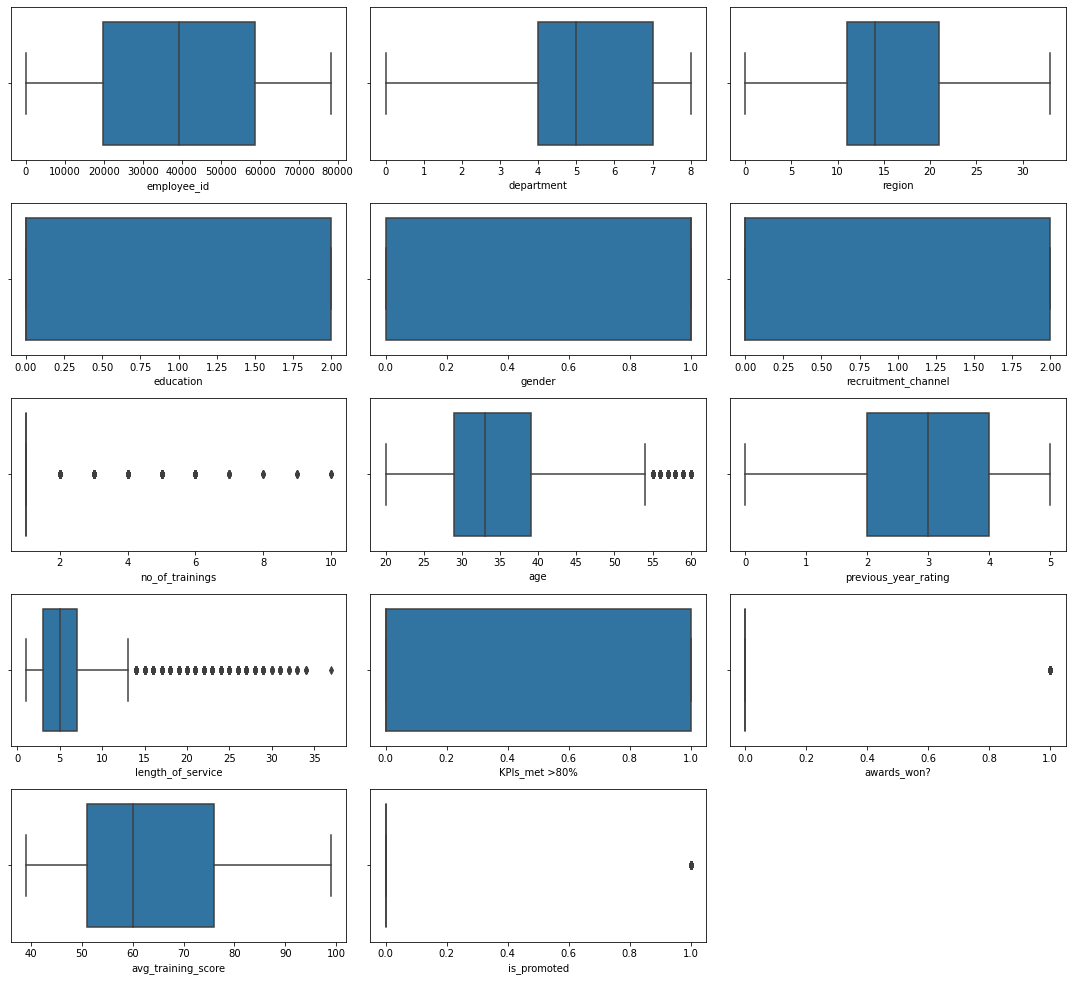

In [26]:
plt.figure(figsize=(15,16))
for i, j in enumerate(train.columns):
    plt.subplot(6,3, i+1)
    sns.boxplot(train[j])
plt.tight_layout()

1. From above box-plots, we can see that there are some outliers in our dataset.
2. Most of the outliers are in length_of_service and no_of_trainings.
3. length_of_service has a lot of positive outliers.

Outliers wont be tampered with as they may contain genuine insight about the employees.

### Univariate Analysis

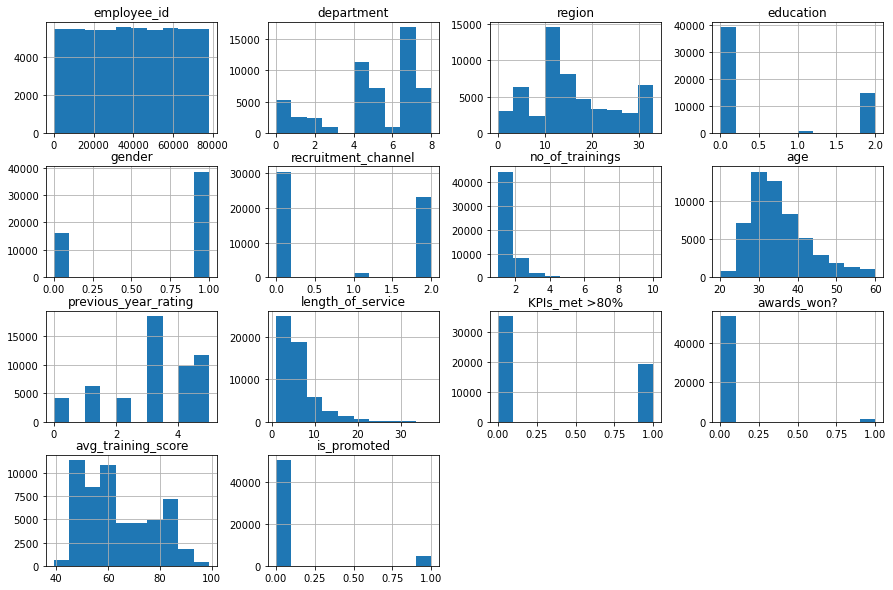

In [27]:
#distribution 
train.hist(figsize =(15,10))
plt.show()

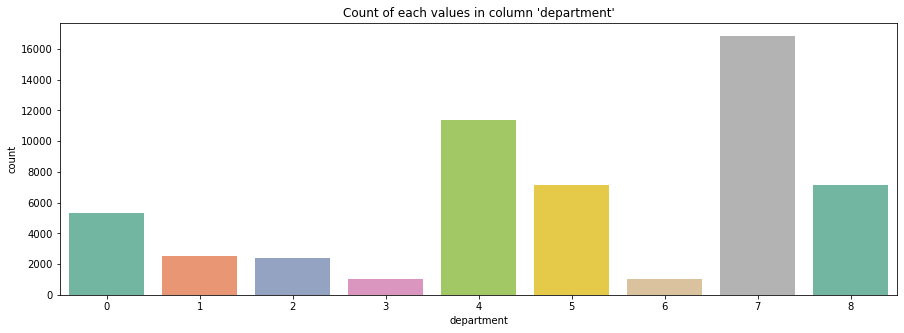

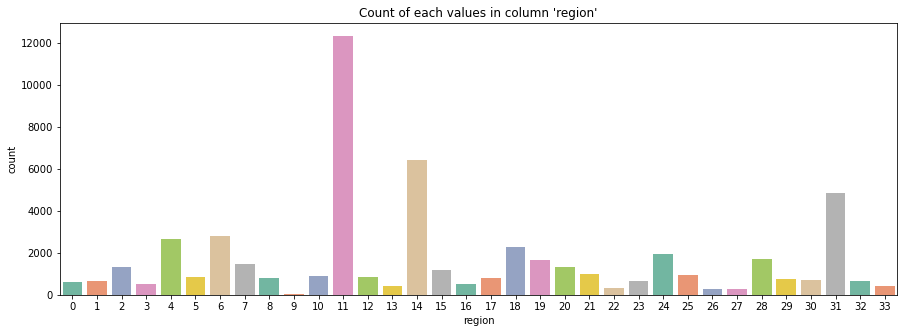

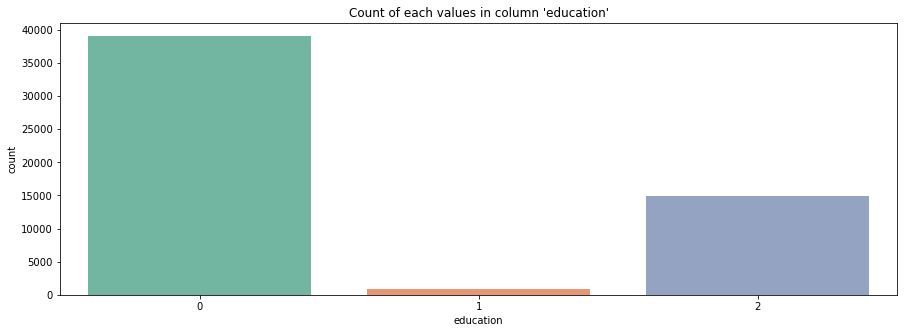

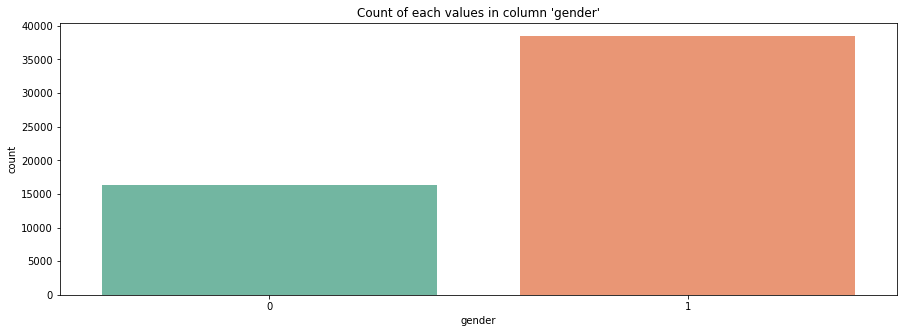

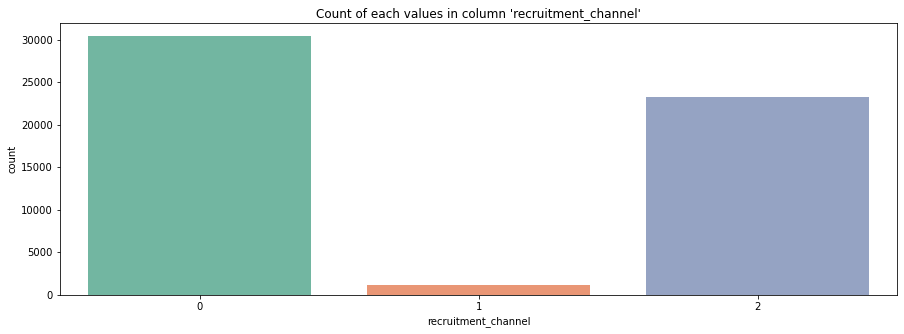

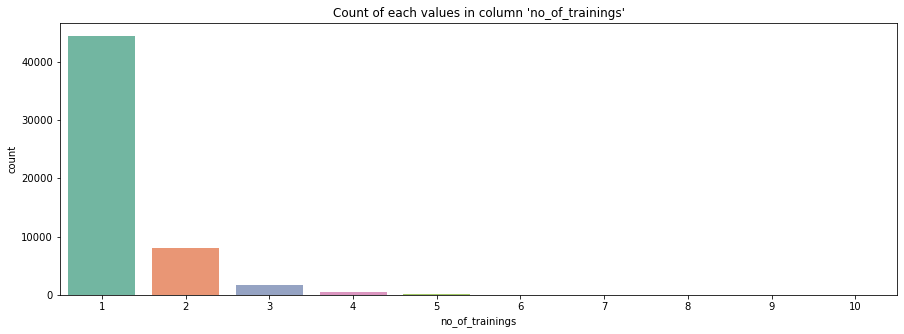

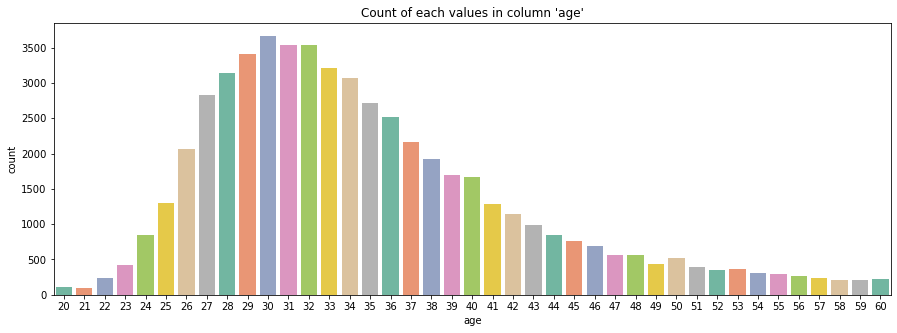

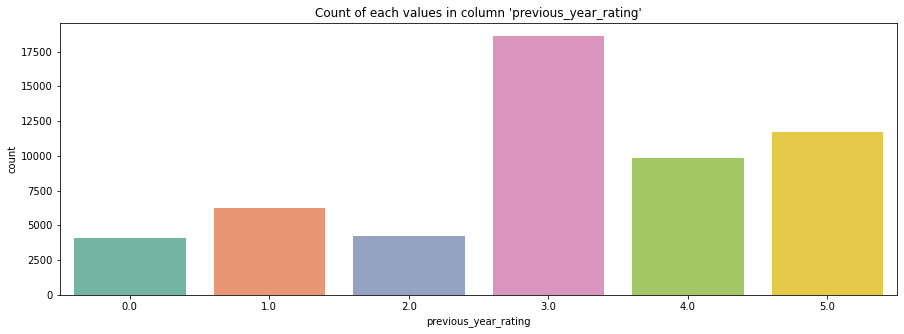

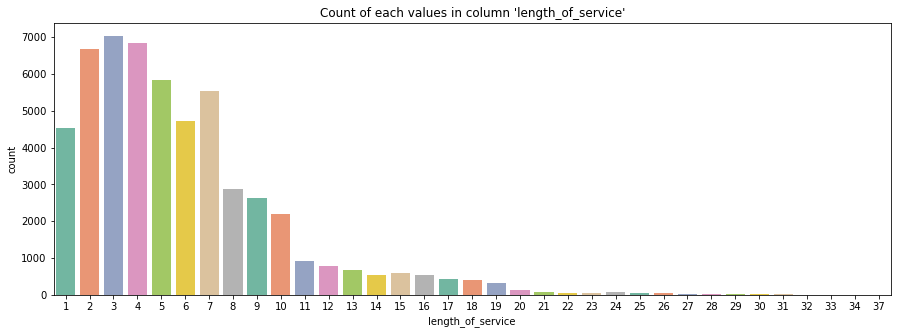

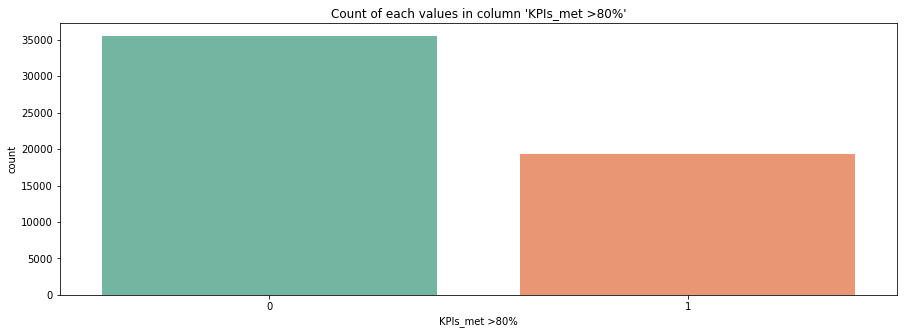

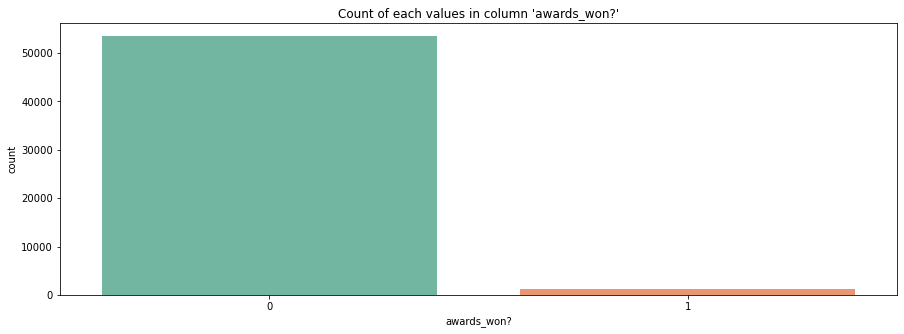

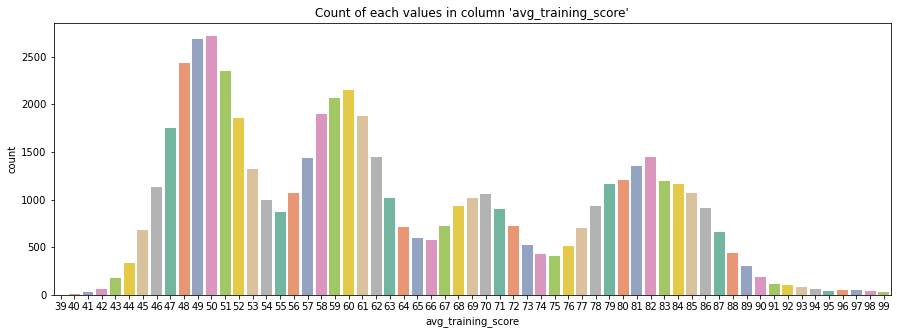

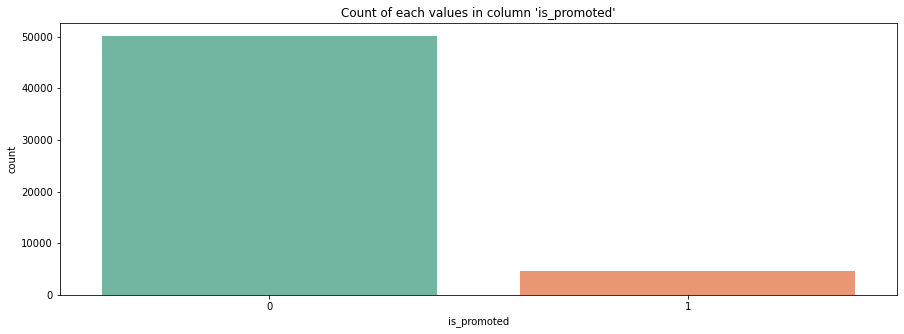

In [28]:
col=['department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating','length_of_service', 'KPIs_met >80%', 'awards_won?','avg_training_score', 'is_promoted']
for i in col:
    plt.figure(figsize=(15,5))
    plt.title("Count of each values in column '{}'".format(i))
    sns.countplot(train[i],palette="Set2")
    plt.show()

1. Only some of the employees could reach above 80% of KPIs set. 
2. Most of the Employees have a very low rating for the previous year
3. Very few employees, probably 2% of them could get awards for their work.
4. 80 % of the employees have taken the training only once, and there are negligible no. of employees, who took trainings more than thrice.
5. Very Few employees are actually working only after their Secondary Education.
6. Females are in minority as compared to their male Counterparts.
7. Referred Employees are very less, i.e., most of the employees are recruited either by sourcing, or some other recruitment agencies, sources etc.

### Bivariate Analysis

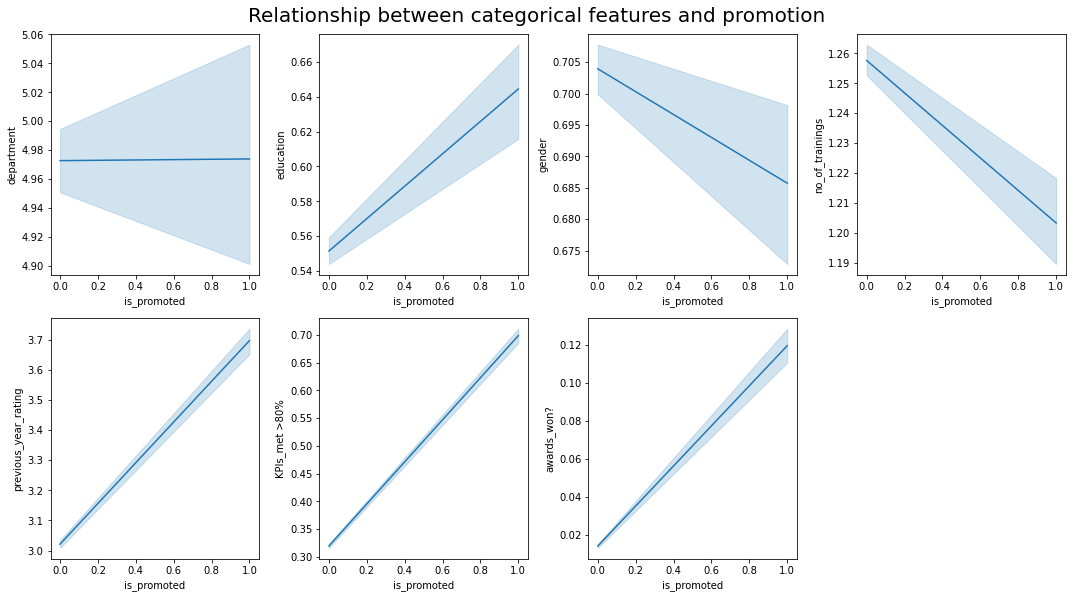

In [29]:
plt.figure(figsize=(15, 12))
plt.suptitle("Relationship between categorical features and promotion",fontsize=20)
acol=train[['department','education','gender','no_of_trainings','previous_year_rating', 'KPIs_met >80%', 'awards_won?']]
for i, j in enumerate(acol):
    plt.subplot(3,4, i+1)
    sns.lineplot(y=train[j],x=train["is_promoted"],palette="cubehelix_r")
plt.tight_layout()

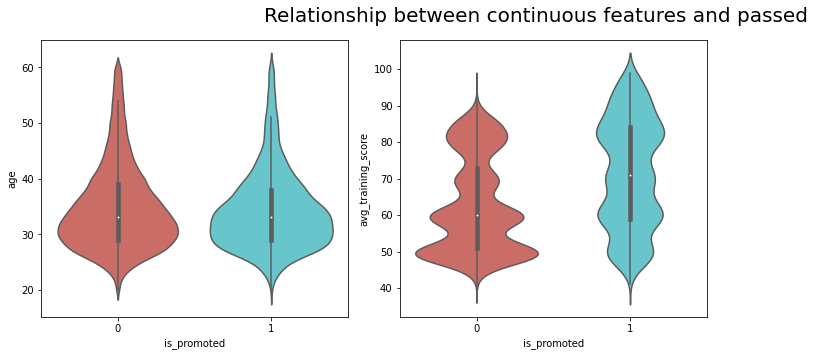

In [30]:
plt.figure(figsize=(15,5))
plt.suptitle("Relationship between continuous features and passed",fontsize=20)
bcol=train[["age","avg_training_score"]]
for i, j in enumerate(bcol):
    plt.subplot(1,3, i+1)
    sns.violinplot(y=train[j],x=train["is_promoted"],palette="hls")
plt.tight_layout()

1. Even though females are in minority, when it comes to promotion they are competing with their Men Counterparts neck-to-neck.
2. Almost all the Departments have a very similar effect on Promotion.
3. awards_won, KPIs_met>80%, previous_year_ratings are directly proportional to promotion.
4. Those people who had only less number of trainings are promoted more.

### Multivariate Analysis

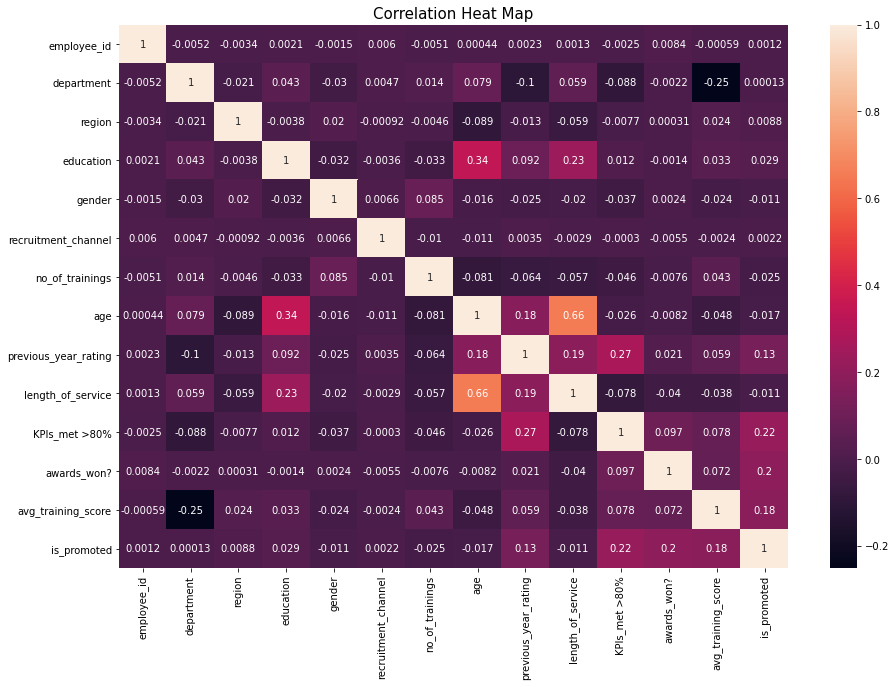

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(), annot = True)
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

1. Length of Service, and Age are highly correlated. 
2. Also, KPIs, and Previous year rating are correlated to some extent, hinting that there is some relation.

### Feature Engineering

In [32]:
# creating a total score column
train['total_score'] = train['avg_training_score'] * train['no_of_trainings']
test['total_score'] = test['avg_training_score'] * test['no_of_trainings']

In [33]:
# lets remove some of the columns which are not very useful for predicting the promotion.
train = train.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)

In [34]:
# the no. of employee who did not get an award, did not acheive 80+ KPI, previous_year_rating is 1 and avg_training score is less than 40but, still got promotion.
extreme=train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)]
extreme

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,total_score
31860,7,0,1,1,27,1.0,2,0,0,58,1,58
51374,7,0,1,1,31,1.0,5,0,0,58,1,58


In [35]:
train = train.drop(extreme.index)

### Splitting the Data

In [36]:
x = train.drop(['is_promoted'], axis = 1)
y = train['is_promoted']

### Oversampling

In [37]:
# It is very important to resample the data, as the Target class is Highly imbalanced.
# Here We are going to use Over Sampling Technique to resample the data.
from imblearn.over_sampling import SMOTE
x_resample, y_resample  = SMOTE().fit_resample(x, y.values.ravel())
# shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(100280, 11)
(100280,)


### Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_std = sc.fit_transform(x_resample)

### Test data

In [39]:
test_1=test.copy()
test = test.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)
x_test=test
x_test = sc.transform(x_test)

### Model Building

In [40]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

### XGBoost Classifier

In [41]:
xgb= XGBClassifier()
xgb.fit(x_std, y_resample)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [42]:
test_1['is_promoted'] = xgb.predict(x_test)
test=test_1[['employee_id','is_promoted']]
test.to_csv('HR_XGB_STD.csv')

In [43]:
data=pd.read_csv(r"HR_XGB_STD.csv")
data.drop("Unnamed: 0",axis=1)

,employee_id,is_promoted
0,8724,1
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0
